In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [4]:
alucar.mes = pd.to_datetime(alucar.mes)

In [5]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

C:\Users\Saulo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


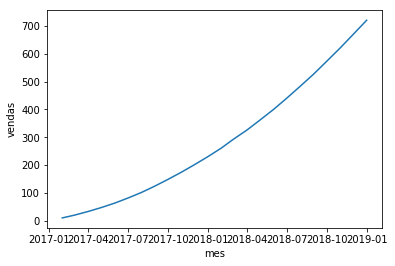

In [6]:
sns.lineplot(x='mes', y='vendas', data=alucar)

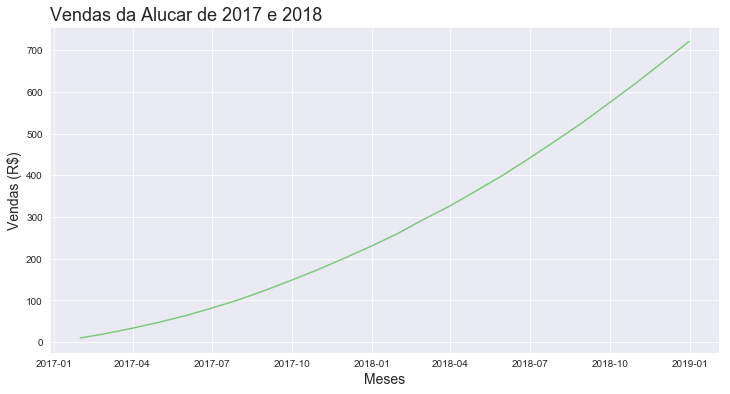

In [7]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
alucar['aumento'] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


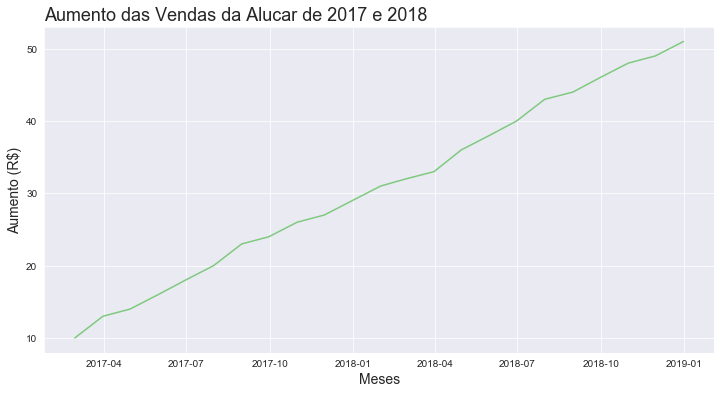

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax = ax

In [14]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

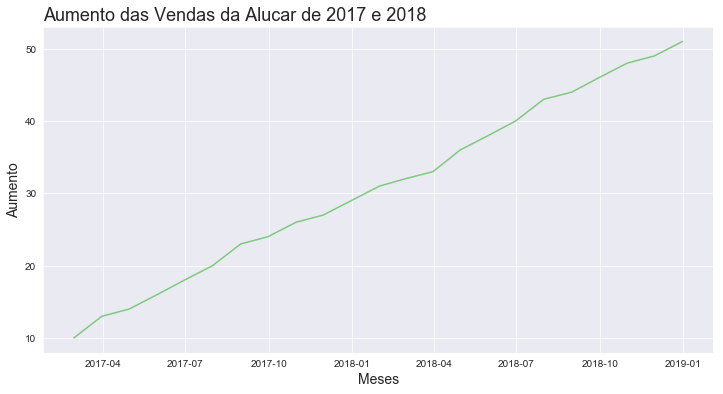

In [16]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Meses', 'Aumento', 'mes', 'aumento', alucar)

In [17]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


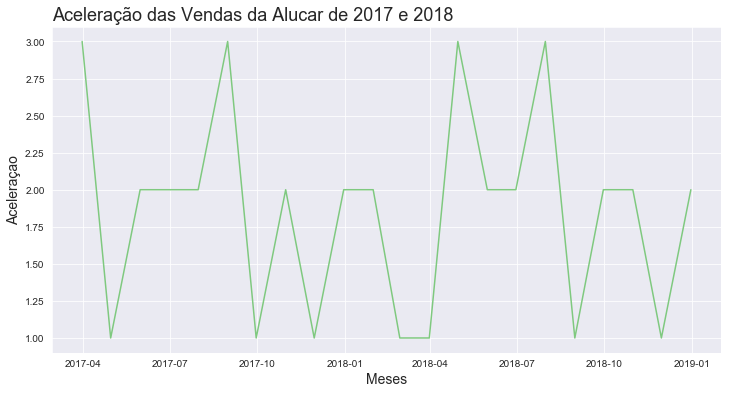

In [19]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Meses', 'Aceleraçao', 'mes', 'aceleracao', alucar)

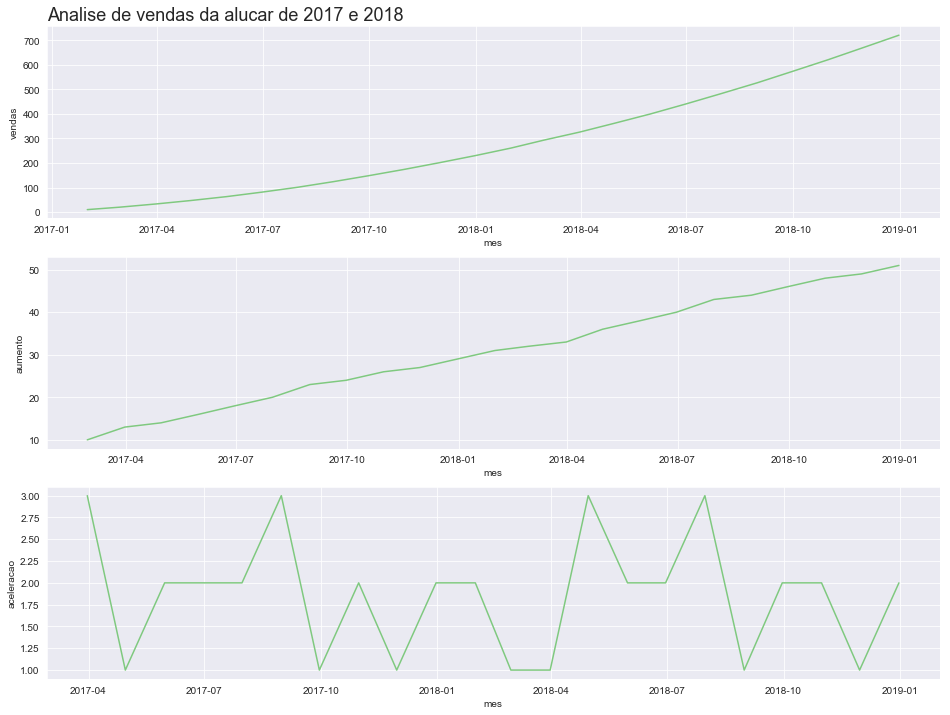

In [22]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)

In [23]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

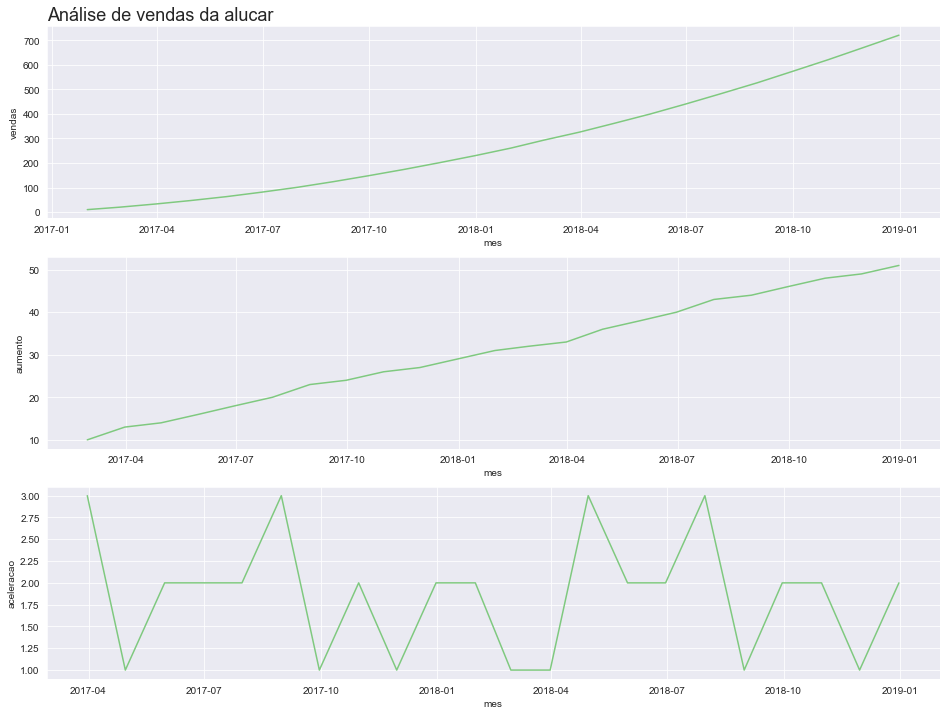

In [24]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da alucar')

## Autocorrelação  
  
Autocorrelação é uma medida de correlação entre as observações de uma série temporal. Comparamos uma série consigo mesma em diferentes passos de lag:

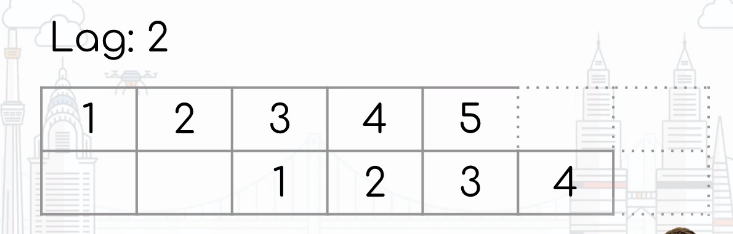

In [25]:
from pandas.plotting import autocorrelation_plot

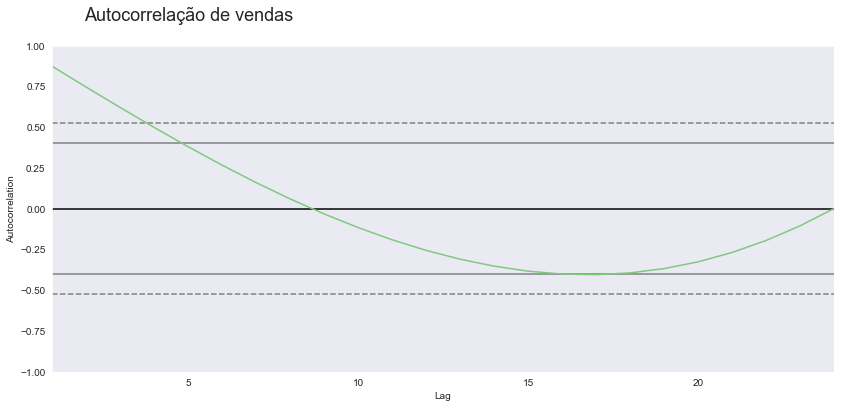

In [32]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Autocorrelação de vendas', fontsize=18, x=0.26, y=0.97)
autocorrelation_plot(alucar['vendas'])
ax = ax

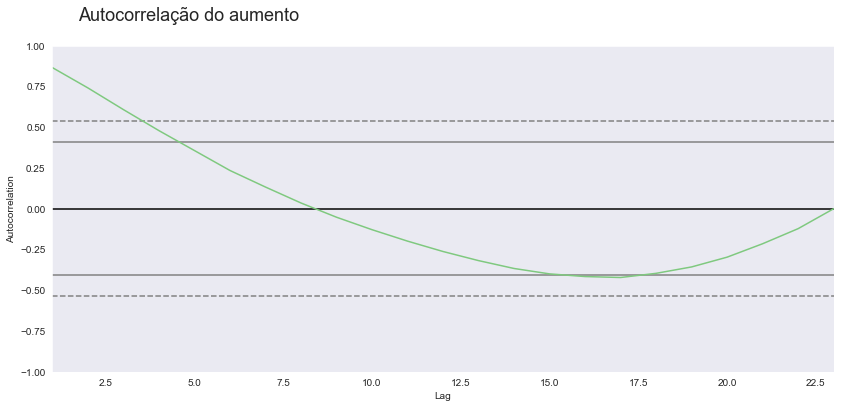

In [34]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Autocorrelação do aumento', fontsize=18, x=0.26, y=0.97)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

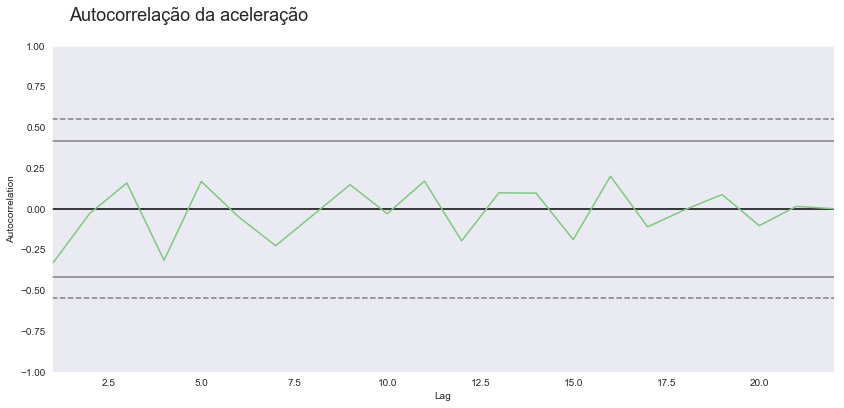

In [35]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Autocorrelação da aceleração', fontsize=18, x=0.26, y=0.97)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax